In [2]:
# Step 1: Load and inspect the dataset
import pandas as pd

# Load dataset
df = pd.read_csv("C:\\Users\\Asus\\OneDrive\\Desktop\\datascience finalprojectgroup\\datasets\\aug_train.csv")

# Basic info
print("Shape of dataset:", df.shape)
print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nFirst 5 rows:")
print(df.head())


Shape of dataset: (19158, 14)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float6

#  Exploratory Data Analysis (EDA)

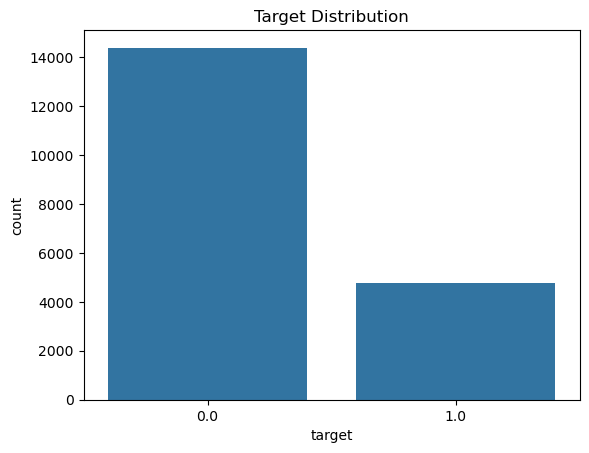

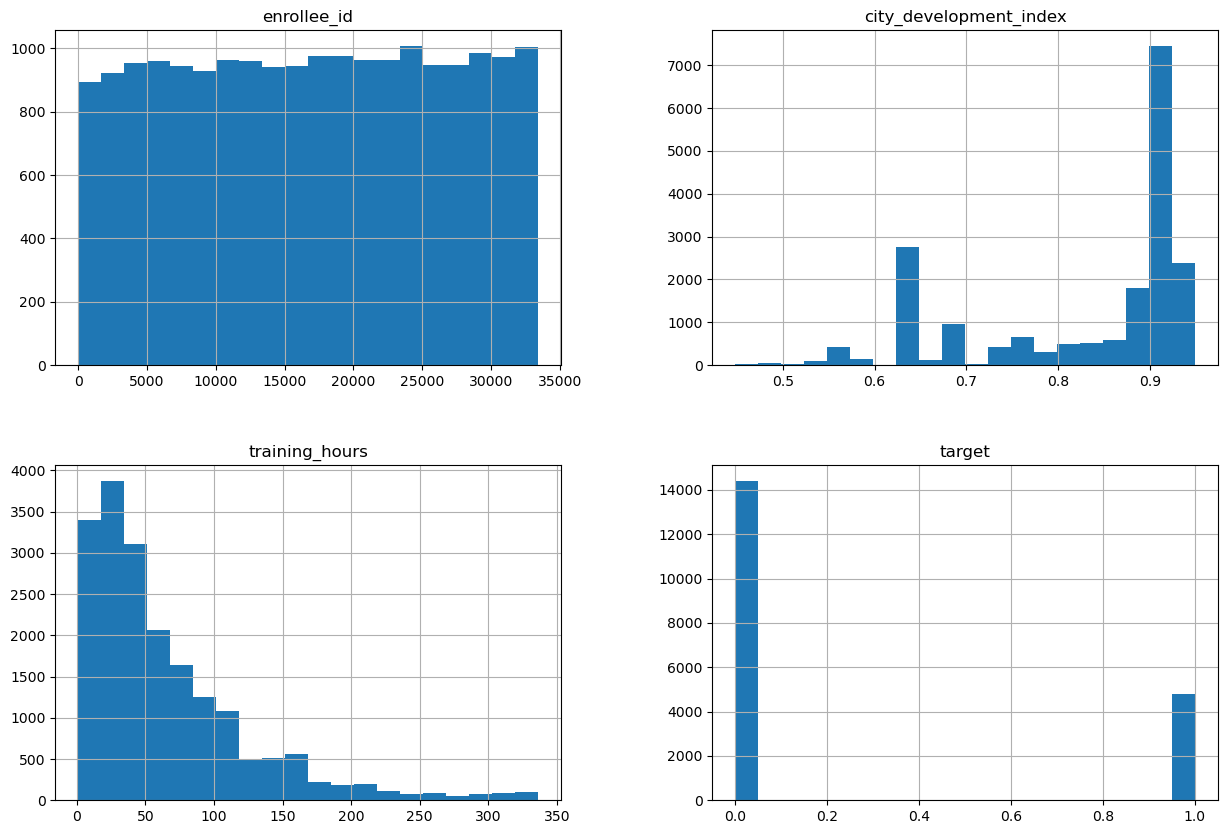

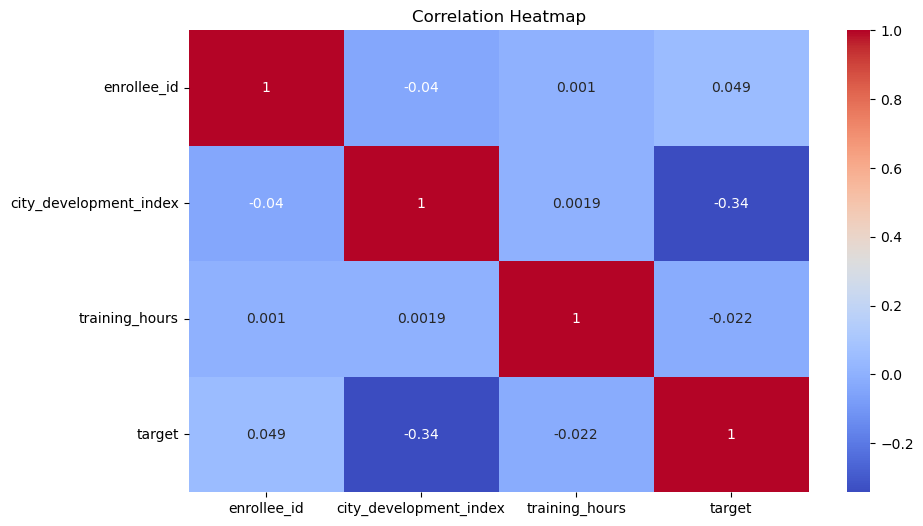

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Target distribution
sns.countplot(x='target', data=df)
plt.title("Target Distribution")
plt.show()

# Numerical columns distribution
df.hist(bins=20, figsize=(15,10))
plt.show()

# Correlation heatmap (numerical only)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


#  Data Preprocessing

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Fill missing values
df.fillna(df.mode().iloc[0], inplace=True)

# Encode categorical features
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col].astype(str))

# Features & Target
X = df.drop('target', axis=1)
y = df['target']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


#  Apply ML Models

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"\n{name} Results:")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))



Logistic Regression Results:
Accuracy: 0.7755741127348643
              precision    recall  f1-score   support

         0.0       0.80      0.94      0.86      2877
         1.0       0.61      0.28      0.38       955

    accuracy                           0.78      3832
   macro avg       0.70      0.61      0.62      3832
weighted avg       0.75      0.78      0.74      3832


Random Forest Results:
Accuracy: 0.7724425887265136
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      2877
         1.0       0.56      0.40      0.47       955

    accuracy                           0.77      3832
   macro avg       0.69      0.65      0.66      3832
weighted avg       0.75      0.77      0.76      3832


SVM Results:
Accuracy: 0.7734864300626305
              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86      2877
         1.0       0.57      0.36      0.45       955

    accuracy               

#  Compare Models

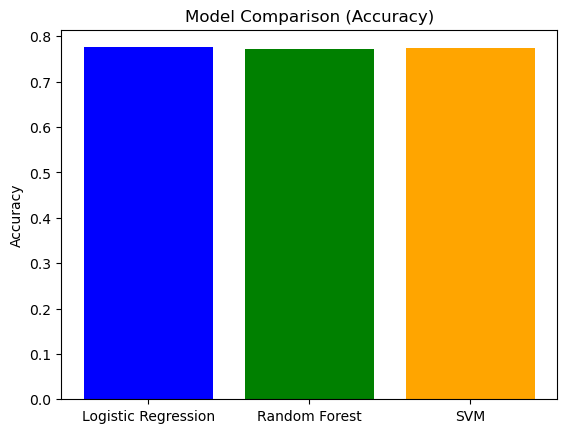

In [6]:
# Compare accuracies
plt.bar(results.keys(), results.values(), color=['blue','green','orange'])
plt.title("Model Comparison (Accuracy)")
plt.ylabel("Accuracy")
plt.show()
